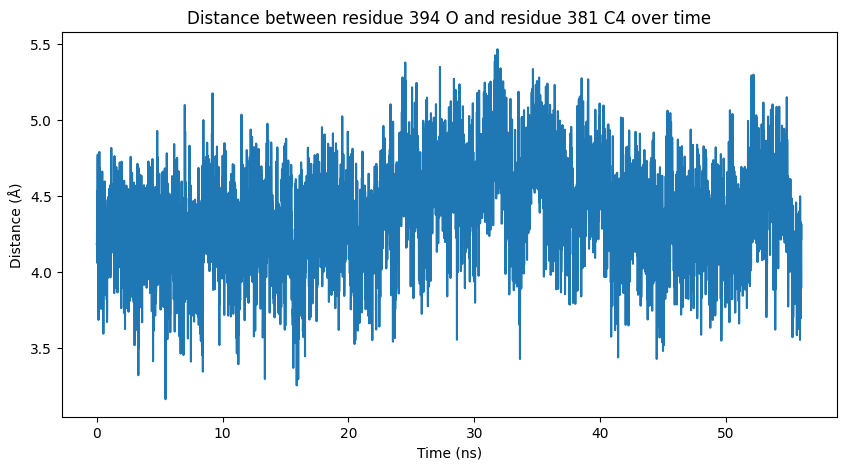

In [6]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the structure and trajectory files
u = mda.Universe("WT_test.pdb", "GPros_6wma_WT.xyz", guess_bonds=False, format='TXYZ')

# Select the atoms or groups of atoms
atom1 = u.select_atoms("resid 394 and name O")  # Example: oxygen atom of residue 394
atom2 = u.select_atoms("resid 381 and name C4")  # Example: carbon atom of residue 381

# Initialize arrays to store distances and times
distances = []
times = []

# Iterate over the trajectory and calculate distances
for i, ts in enumerate(u.trajectory):
    distance = np.linalg.norm(atom1.positions - atom2.positions)
    distances.append(distance)
    times.append(i * 0.01)  # Each frame corresponds to 0.01 ns (10 ps)

# Convert distances and times to numpy arrays
distances = np.array(distances)
times = np.array(times)

# Save the distances and times to a .dat file in CSV format with 3 decimal places
output_data = np.column_stack((times, distances))
np.savetxt("DistA_dC_C4-O_WAT.dat", output_data, delimiter=",", fmt="%.3f", header="Time (ns),Distance (Å)", comments='')

# Plot the distances over time
plt.figure(figsize=(10, 5))
plt.plot(times, distances)
plt.xlabel("Time (ns)")
plt.ylabel("Distance (Å)")
plt.title("Distance between residue 394 O and residue 381 C4 over time")
plt.show()